## Boston房价预测 1607104130-鲍骞月

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [52]:
# 先导入数据分析一波  
from sklearn import datasets

boston = datasets.load_boston()

X = boston.data
features_name = boston.feature_names
y = boston.target

In [53]:
print(X.shape, y.shape)
print(boston.feature_names)

(506, 13) (506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


一共有十三个特征，这里进行绘图分析每个特征与房价的关系

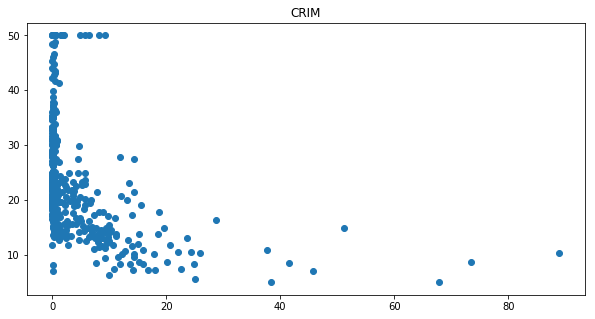

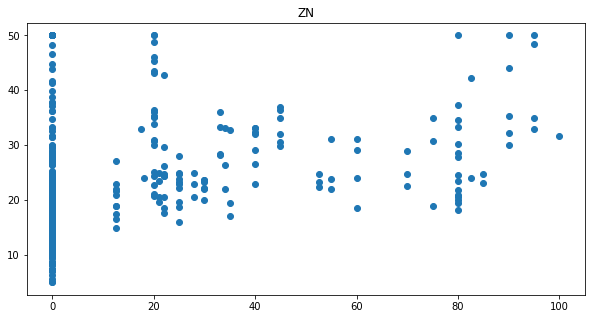

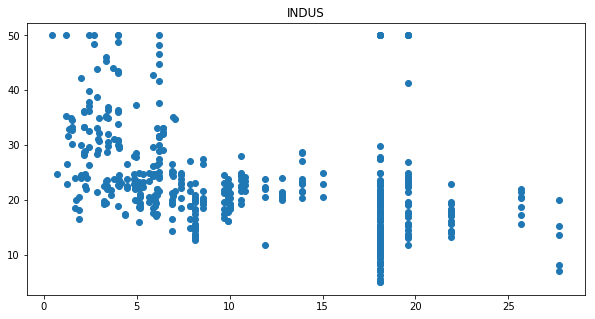

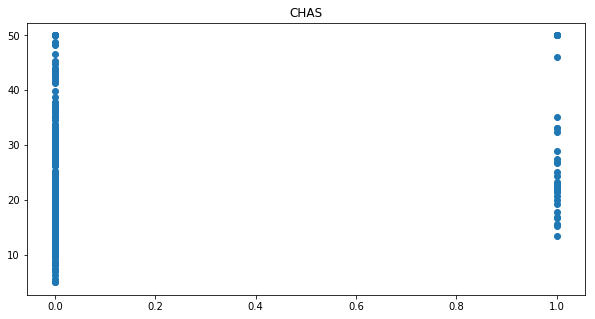

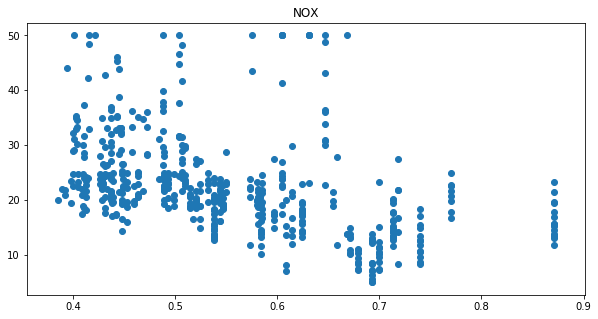

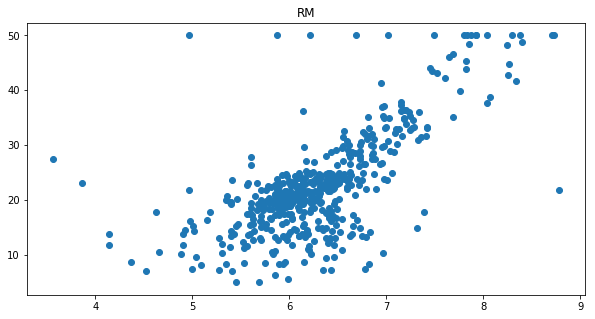

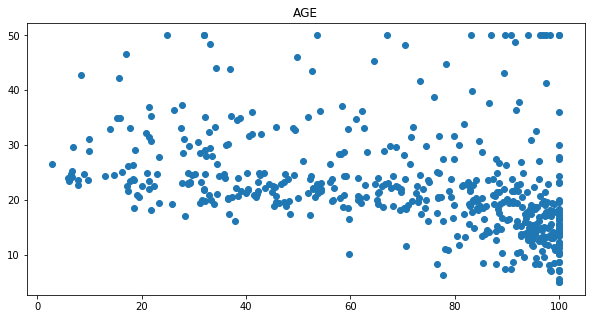

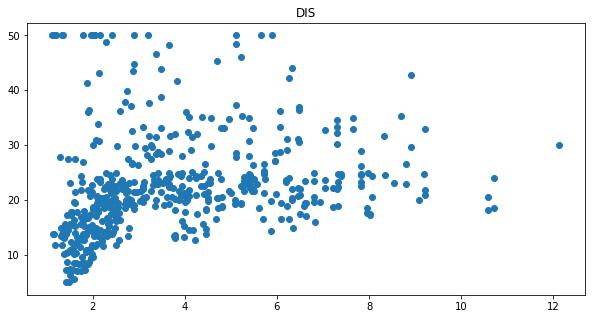

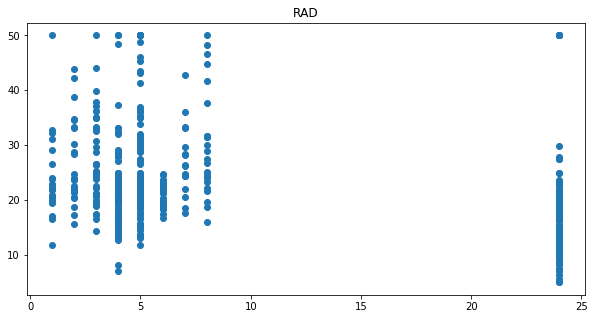

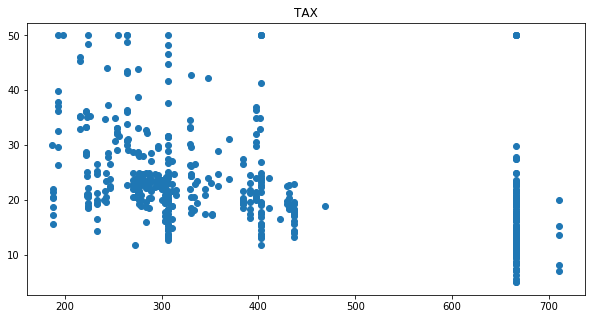

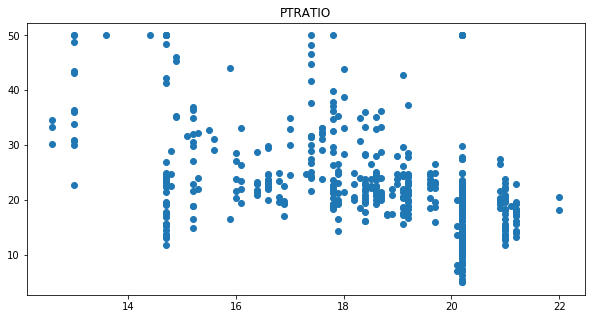

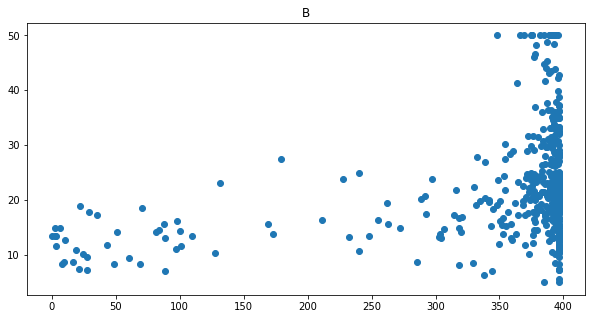

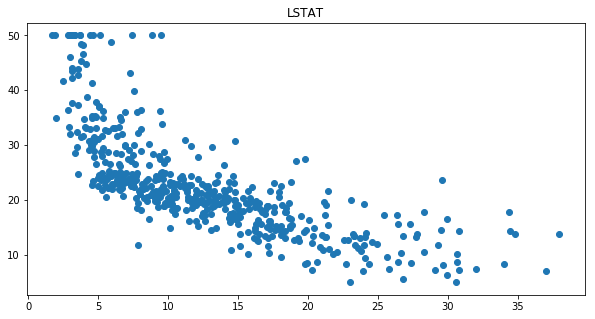

In [54]:
for i in range(1, 14):
    plt.figure(figsize=(10, 5))
    plt.title(features_name[i-1])
    plt.scatter(X[:, i-1], y)
plt.show()

## 数据特征解释    

通过分析上图的效果，挑出下列三个特征
* RM代表房子的平均房间数量     
* LSTAT代表该区域中低收入阶层的比例   
* PTRATIO代表镇上学生和教师数量的比例，一定程度上也能反应当地的贫富情况    
* MEDV代表当地房价    

可以看出三个特征与房价都有一定的线性关系

## 训练数据测试数据准备

In [55]:
# train test split  

def train_test_split(X, y, radio=0.2):
    # 先给定随机种子
    np.random.seed(888)
    # 乱序index
    index = np.random.permutation(len(X))
    test_size = int(len(X) * radio)
    test_index = index[:test_size]
    train_index = index[test_size:]
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    return X_train, X_test, y_train, y_test

X_train = pd.DataFrame(X)
X_train.columns = boston.feature_names
X = np.array(X_train[['RM', 'LSTAT', 'PTRATIO']])
print(X)
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

[[ 6.575  4.98  15.3  ]
 [ 6.421  9.14  17.8  ]
 [ 7.185  4.03  17.8  ]
 ...
 [ 6.976  5.64  21.   ]
 [ 6.794  6.48  21.   ]
 [ 6.03   7.88  21.   ]]
(405, 3) (101, 3) (405,) (101,)


## 模型训练 

In [56]:
# 数据归一化  
def data_normalize(data):
    # 对每一列特征进行归一化处理
    res = np.empty(shape=data.shape, dtype=np.float)
    mean = np.array([np.min(data[:, i]) for i in range(data.shape[1])])
    size = np.array([np.max(data[:, i]) - np.min(data[:, i]) for i in range(data.shape[1])])
    for i in range(data.shape[1]):
        res[:, i] = (data[:, i] - mean[i]) / size[i]
    return res

### 线性回归   

损失函数:   
$$\frac{1}{2m}\sum_{i=1}^{m}(y^{(i)}-X_b\theta)^2$$

In [57]:
# 计算损失函数
def J(X_b, y, theta):
    m = len(y)
    tmp = np.sum((X_b.dot(theta) - y)**2)
    return tmp / (2 * m)

# 计算梯度   
def dJ(X_b, y, theta):
    grd = np.empty(len(theta))
    grd[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1, len(theta)):
        grd[i] = (X_b.dot(theta) - y).dot(X_b[:, i])
    return grd / len(X_b)

# 梯度下降 
def gradient_descent(X_b, y, theta, n_iters=10000, eta=0.01):
    losses = []
    for i in range(n_iters):
        grad = dJ(X_b, y, theta)
        theta = theta - eta * grad
        loss = J(X_b, y, theta)
        losses.append(loss)
        if i % 500 == 0:
            print('step: %d, current J: %f' % (i, J(X_b, y, theta)))
    return theta, losses
# train
def train(X, y):
    # 先对X插入1列1
    X_b = np.hstack([np.ones((len(X), 1)), X])
    # 初始化参数theta
    init_theta = np.zeros(X_b.shape[1])
    theta, losses = gradient_descent(X_b, y, init_theta)
    return theta, losses

# predict
def predict(X, theta):
    X_b = np.hstack([np.ones((len(X), 1)), X])
    # 带入预测函数
    temp = X_b.dot(theta)
    return temp

In [58]:
# 模型训练
# 特征归一化
X_train = data_normalize(X_train)
print(X_train)
theta, losses = train(X_train, y_train)

[[0.8357923  0.04375765 0.10638298]
 [0.2044453  0.99877601 0.80851064]
 [0.53592642 0.29039168 0.42553191]
 ...
 [0.5834451  0.17258262 0.42553191]
 [0.41118988 0.31456548 0.70212766]
 [0.42077026 0.25642595 0.80851064]]
step: 0, current J: 286.409317
step: 500, current J: 35.164517
step: 1000, current J: 24.897244
step: 1500, current J: 19.590454
step: 2000, current J: 16.847093
step: 2500, current J: 15.428506
step: 3000, current J: 14.694614
step: 3500, current J: 14.314644
step: 4000, current J: 14.117651
step: 4500, current J: 14.015288
step: 5000, current J: 13.961888
step: 5500, current J: 13.933842
step: 6000, current J: 13.918943
step: 6500, current J: 13.910875
step: 7000, current J: 13.906370
step: 7500, current J: 13.903735
step: 8000, current J: 13.902091
step: 8500, current J: 13.900982
step: 9000, current J: 13.900169
step: 9500, current J: 13.899527


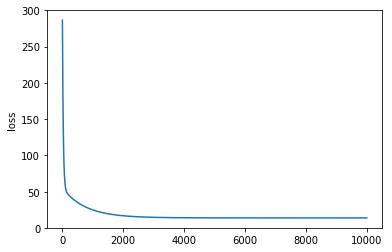

In [59]:
# 绘制loss曲线
plt.plot(np.arange(0, 10000), losses)
plt.ylabel('loss')
plt.show()

使用测试数据集来绘制拟合效果,并且计算模型的决定系数

In [60]:
from sklearn.metrics import r2_score

# 在预测时，首先也要对测试数据进行归一化操作
X_test = data_normalize(X_test)
y_predict = predict(X_test, theta)
# 计算决定系数
r2_score(y_test, y_predict)

0.6201260241883013

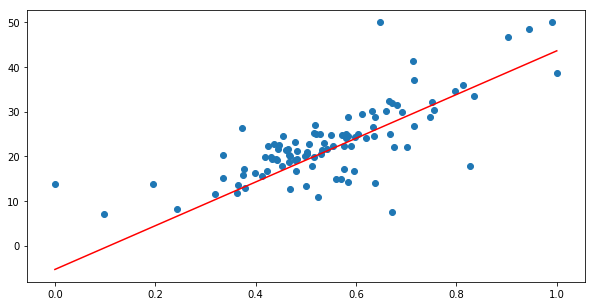

In [61]:
# 使用RM特征来绘制模型的回归效果
y_predict = predict(X_test, theta)
plt.figure(figsize=(10, 5))
plt.scatter(X_test[:, 0], y_test)
plt.plot([np.min(X_test[:, 0]), np.max(X_test[:, 0])], [np.min(y_predict), np.max(y_predict)], color='r')
plt.show()
